In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import folium
import re
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
def concat_frames_columns_emo(geo_response, response, date_range, time_range='4am-6am', days='m-f', in_or_out='outbound'):
    """This function pulls in two API requests, puts one in a geodataframe the other in a dataframe and concats desired columns"""
    geo_df = gpd.GeoDataFrame.from_features(geo_response.json()['features'])
    res_df = pd.DataFrame(response.json()['data']['segments'])
    full_df = pd.concat([geo_df, res_df[['countForSegment', 'percent20Secs']]], axis = 1)
    full_df['dates'] = date_range
    full_df['time'] = time_range
    full_df['days_of_week'] = days
    full_df['direction']= in_or_out
    full_df['max_seg_count'] = full_df['countForSegment'].max()
    full_df['proportion_of_segments'] = full_df['countForSegment']/full_df['max_seg_count']
    return full_df

In [3]:
with open('../data/WeGo.json') as fi:
    credentials = json.load(fi)

In [4]:
Authorization = credentials['Authorization']

In [5]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/23'

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [6]:
params = {
    'direction': '1',
    'startDate': '01-25-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '02-24-2022',
    'endTime' : '06:00',
    'excludeDates': '02-18-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}

#use the EXACT same parameters as above except do not include the format parameter below
params1 = {
    'direction': '0',
    'startDate': '01-25-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '02-24-2022',
    'endTime' : '06:00',
    'excludeDates': '02-18-2022',
    'resolution': 'hiRes',
}

In [7]:
emo_jantofeb = concat_frames_columns_emo(requests.get(URL, params = params, headers = headers), 
                                      requests.get(URL, params = params1, headers = headers), "1/25/22-2/24/22")
emo_jantofeb

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.585833,5.268618,9.758,6.013,...,3.158,1.781,28,1.924,1/25/22-2/24/22,4am-6am,m-f,outbound,110,0.254545
1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.547353,9.525574,4.625,4.139,...,1.750,1.525,34,3.735,1/25/22-2/24/22,4am-6am,m-f,outbound,110,0.309091
2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,2.083270,11.937483,3.024,2.491,...,1.696,0.996,87,1.900,1/25/22-2/24/22,4am-6am,m-f,outbound,110,0.790909
3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,1.772146,13.522588,3.853,2.132,...,1.505,1.279,33,1.572,1/25/22-2/24/22,4am-6am,m-f,outbound,110,0.300000
4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,2.719365,8.965696,6.582,4.887,...,1.534,1.207,103,1.461,1/25/22-2/24/22,4am-6am,m-f,outbound,110,0.936364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,99,1.645,1/25/22-2/24/22,4am-6am,m-f,outbound,110,0.900000
881,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,32,1.289,1/25/22-2/24/22,4am-6am,m-f,outbound,110,0.290909
882,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,42,1.312,1/25/22-2/24/22,4am-6am,m-f,outbound,110,0.381818
883,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38,1.492,1/25/22-2/24/22,4am-6am,m-f,outbound,110,0.345455


In [8]:
params = {
    'direction': '0',
    'startDate': '02-25-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '03-26-2022',
    'endTime' : '06:00',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '0',
    'startDate': '02-25-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '03-26-2022',
    'endTime' : '06:00',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'resolution': 'hiRes',
}

In [9]:
emo_febtomar = concat_frames_columns_emo(requests.get(URL, params = params, headers = headers), 
                                      requests.get(URL, params = params1, headers = headers), "2/25/22-3/26/22")
emo_febtomar

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.019792,12.134913,2.553,2.346,...,1.762,1.503,24,1.853,2/25/22-3/26/22,4am-6am,m-f,outbound,79,0.303797
1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,5.670200,4.389440,10.605,8.799,...,3.067,2.951,25,3.508,2/25/22-3/26/22,4am-6am,m-f,outbound,79,0.316456
2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,2.935642,7.232830,19.954,3.217,...,1.785,1.709,53,1.862,2/25/22-3/26/22,4am-6am,m-f,outbound,79,0.670886
3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,1.979962,12.002756,5.710,2.412,...,1.376,1.275,26,1.534,2/25/22-3/26/22,4am-6am,m-f,outbound,79,0.329114
4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.624468,15.115718,2.201,1.873,...,1.435,1.341,77,1.474,2/25/22-3/26/22,4am-6am,m-f,outbound,79,0.974684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,2.402521,9.852151,8.983,4.642,...,1.532,0.878,73,1.662,2/25/22-3/26/22,4am-6am,m-f,outbound,79,0.924051
905,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,1.455417,16.196733,2.032,1.749,...,1.212,1.135,24,1.285,2/25/22-3/26/22,4am-6am,m-f,outbound,79,0.303797
906,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,1.780667,13.452263,6.902,1.922,...,1.300,1.216,30,1.333,2/25/22-3/26/22,4am-6am,m-f,outbound,79,0.379747
907,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,1.855125,13.103699,2.504,2.235,...,1.323,1.242,24,1.589,2/25/22-3/26/22,4am-6am,m-f,outbound,79,0.303797


In [10]:
params = {
    'direction': '0',
    'startDate': '03-27-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '04-26-2022',
    'endTime' : '06:00',
    'excludeDates': '04-14-2022,04-15-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '0',
    'startDate': '03-27-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '04-26-2022',
    'endTime' : '06:00',
    'excludeDates': '04-14-2022,04-15-2022',
    'resolution': 'hiRes',
}

In [11]:
emo_martoapr = concat_frames_columns_emo(requests.get(URL, params = params, headers = headers), 
                                       requests.get(URL, params = params1, headers = headers), "3/27/22-4/26/22")
emo_martoapr

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.211042,11.085271,3.058,2.620,...,1.662,1.496,24,1.891,3/27/22-4/26/22,4am-6am,m-f,outbound,100,0.24
1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,8.735500,2.849179,94.858,12.046,...,3.092,2.859,28,3.270,3/27/22-4/26/22,4am-6am,m-f,outbound,100,0.28
2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,3.525500,6.022692,14.797,8.765,...,1.882,1.632,74,1.946,3/27/22-4/26/22,4am-6am,m-f,outbound,100,0.74
3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,2.233054,10.642376,11.407,2.550,...,1.582,1.395,37,1.635,3/27/22-4/26/22,4am-6am,m-f,outbound,100,0.37
4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.616386,15.191297,2.236,1.793,...,1.464,1.256,88,1.532,3/27/22-4/26/22,4am-6am,m-f,outbound,100,0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,2.510302,9.429144,9.583,4.116,...,1.573,1.122,96,1.722,3/27/22-4/26/22,4am-6am,m-f,outbound,100,0.96
881,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,1.738966,13.555757,3.279,3.201,...,1.357,1.187,29,1.408,3/27/22-4/26/22,4am-6am,m-f,outbound,100,0.29
882,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,1.523054,15.727610,2.180,1.839,...,1.327,1.224,37,1.364,3/27/22-4/26/22,4am-6am,m-f,outbound,100,0.37
883,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,2.230459,10.898654,4.859,3.394,...,1.482,1.374,37,1.617,3/27/22-4/26/22,4am-6am,m-f,outbound,100,0.37


In [12]:
params = {
    'direction': '0',
    'startDate': '04-27-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-25-2022',
    'endTime' : '06:00',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '0',
    'startDate': '04-27-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-25-2022',
    'endTime' : '06:00',
    'resolution': 'hiRes',
}

In [13]:
emo_aprtomay = concat_frames_columns_emo(requests.get(URL, params = params, headers = headers), 
                                      requests.get(URL, params = params1, headers = headers), "4/27/22-5/25/22")
emo_aprtomay

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.095821,11.694701,2.763,2.513,...,1.803,1.698,28,1.829,4/27/22-5/25/22,4am-6am,m-f,outbound,99,0.282828
1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,4.368032,5.697989,8.623,6.585,...,2.538,2.324,31,2.729,4/27/22-5/25/22,4am-6am,m-f,outbound,99,0.313131
2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,3.063363,6.931271,9.607,6.675,...,1.718,1.462,80,1.823,4/27/22-5/25/22,4am-6am,m-f,outbound,99,0.808081
3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,3.172618,7.490659,28.648,2.988,...,1.466,1.340,34,1.539,4/27/22-5/25/22,4am-6am,m-f,outbound,99,0.343434
4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.655448,14.832843,2.082,1.845,...,1.454,1.342,96,1.509,4/27/22-5/25/22,4am-6am,m-f,outbound,99,0.969697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,2.600840,9.100906,9.671,4.620,...,1.631,1.123,94,1.706,4/27/22-5/25/22,4am-6am,m-f,outbound,99,0.949495
880,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,1.810750,13.018363,5.408,3.413,...,1.161,1.133,20,1.355,4/27/22-5/25/22,4am-6am,m-f,outbound,99,0.202020
881,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,1.691389,14.162325,7.955,1.870,...,1.303,1.173,36,1.370,4/27/22-5/25/22,4am-6am,m-f,outbound,99,0.363636
882,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,1.818212,13.369728,2.588,2.343,...,1.328,1.280,33,1.389,4/27/22-5/25/22,4am-6am,m-f,outbound,99,0.333333


In [14]:
params = {
    'direction': '0',
    'startDate': '05-26-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '06-25-2022',
    'endTime' : '06:00',
    'excludeDates': '05-30-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '0',
    'startDate': '05-26-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '06-25-2022',
    'endTime' : '06:00',
    'excludeDates': '05-30-2022',
    'resolution': 'hiRes',
}

In [15]:
emo_maytojun = concat_frames_columns_emo(requests.get(URL, params = params, headers = headers), 
                                      requests.get(URL, params = params1, headers = headers), "5/26/22-6/25/22")
emo_maytojun

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.068885,11.846961,2.718,2.358,...,1.834,1.769,26,1.868,5/26/22-6/25/22,4am-6am,m-f,outbound,102,0.254902
1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,5.052571,4.926007,9.824,7.636,...,2.994,2.887,28,3.374,5/26/22-6/25/22,4am-6am,m-f,outbound,102,0.274510
2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,3.106718,6.834544,9.580,6.615,...,1.709,0.809,78,1.795,5/26/22-6/25/22,4am-6am,m-f,outbound,102,0.764706
3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,2.148686,11.060248,10.663,2.364,...,1.429,1.231,35,1.519,5/26/22-6/25/22,4am-6am,m-f,outbound,102,0.343137
4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.646427,14.914114,2.127,1.855,...,1.441,1.335,96,1.534,5/26/22-6/25/22,4am-6am,m-f,outbound,102,0.941176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,1.858330,12.737243,2.767,2.296,...,1.502,0.759,94,1.621,5/26/22-6/25/22,4am-6am,m-f,outbound,102,0.921569
881,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,1.610406,14.637924,3.231,2.089,...,1.215,1.113,32,1.324,5/26/22-6/25/22,4am-6am,m-f,outbound,102,0.313725
882,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,1.456205,16.449607,2.100,1.774,...,1.233,1.116,39,1.257,5/26/22-6/25/22,4am-6am,m-f,outbound,102,0.382353
883,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,1.822121,13.341046,4.662,2.447,...,1.287,1.234,33,1.336,5/26/22-6/25/22,4am-6am,m-f,outbound,102,0.323529


In [16]:
params = {
    'direction': '0',
    'startDate': '06-26-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '07-26-2022',
    'endTime' : '06:00',
    'excludeDates': '07-04-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '0',
    'startDate': '06-26-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '07-26-2022',
    'endTime' : '06:00',
    'excludeDates': '07-04-2022',
    'resolution': 'hiRes',
}

In [17]:
emo_juntojul = concat_frames_columns_emo(requests.get(URL, params = params, headers = headers), 
                                      requests.get(URL, params = params1, headers = headers), "6/26/22-7/26/22")
emo_juntojul

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.034227,12.048803,2.633,2.327,...,1.674,1.557,22,1.831,6/26/22-7/26/22,4am-6am,m-f,outbound,101,0.217822
1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,4.412536,5.640521,7.433,6.691,...,2.469,2.220,28,2.775,6/26/22-7/26/22,4am-6am,m-f,outbound,101,0.277228
2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,3.136838,6.768918,19.988,7.662,...,1.703,1.610,80,1.789,6/26/22-7/26/22,4am-6am,m-f,outbound,101,0.792079
3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,1.853129,12.824256,2.556,2.426,...,1.414,1.337,31,1.528,6/26/22-7/26/22,4am-6am,m-f,outbound,101,0.306931
4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.651848,14.865169,2.115,1.904,...,1.456,0.860,99,1.510,6/26/22-7/26/22,4am-6am,m-f,outbound,101,0.980198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,1.895149,12.489783,7.339,2.290,...,1.455,0.876,94,1.606,6/26/22-7/26/22,4am-6am,m-f,outbound,101,0.930693
881,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,1.765957,13.348570,7.603,1.837,...,1.261,1.168,23,1.326,6/26/22-7/26/22,4am-6am,m-f,outbound,101,0.227723
882,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,1.456750,16.443453,3.040,1.742,...,1.242,1.194,40,1.273,6/26/22-7/26/22,4am-6am,m-f,outbound,101,0.396040
883,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,1.679800,14.471366,2.424,2.245,...,1.226,1.145,30,1.350,6/26/22-7/26/22,4am-6am,m-f,outbound,101,0.297030


In [18]:
all_emo_inschool = pd.concat([emo_jantofeb, emo_febtomar, emo_martoapr, emo_aprtomay])
all_emo_inschool = all_emo_inschool.reset_index()
all_emo_inschool.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,3563.000000,3125.000000,3125.000000,3125.000000,3125.000000,3125.000000,3125.00000,3125.000000,3125.000000,3125.000000,3125.000000,3125.000000,3563.000000,3563.000000,3563.000000,3563.000000
mean,444.937412,23.983297,3.058989,10.805397,10.772349,5.165541,3.83118,3.171329,2.512717,2.148277,1.861464,1.620827,58.625316,1.947086,96.878193,0.604923
std,257.282373,1.156920,7.587208,3.488694,30.694468,14.526642,10.33316,8.040937,6.804835,6.470797,6.441529,6.444518,30.164060,4.733257,11.308659,0.301115
min,0.000000,0.000000,1.367154,0.000000,1.513000,1.513000,1.46700,1.382000,1.328500,1.258000,1.135000,0.437000,1.000000,1.184000,79.000000,0.010000
25%,222.000000,23.670000,1.802937,8.609024,2.861000,2.227000,2.00500,1.874000,1.677500,1.546000,1.388000,1.207000,34.000000,1.473000,79.000000,0.383838
50%,445.000000,24.175000,2.153583,11.116257,3.938000,2.795000,2.42800,2.210000,1.952000,1.772000,1.563000,1.363000,43.000000,1.694000,99.000000,0.405063
75%,667.500000,24.655000,2.786275,13.294962,7.018000,4.055000,3.24800,2.862000,2.429000,2.119000,1.827000,1.576000,93.000000,2.000500,100.000000,0.949495
max,908.000000,24.969000,255.042000,17.789369,423.713000,322.248000,255.04200,255.042000,255.042000,255.042000,255.042000,255.042000,110.000000,240.007000,110.000000,1.000000


In [19]:
all_emo_summer = pd.concat([emo_maytojun, emo_juntojul])
all_emo_summer = all_emo_summer.reset_index()
all_emo_summer.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,1770.00000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000
mean,442.00000,23.984905,2.792090,11.361500,9.249383,4.706216,3.457376,2.962231,2.301232,1.949715,1.691438,1.444438,62.361017,1.824328,101.500000,0.614412
std,255.54953,1.194886,4.927767,3.515605,28.214712,13.149975,7.443788,6.521725,3.435676,2.839714,2.770517,2.773276,31.795224,2.791501,0.500141,0.313327
min,0.00000,0.000000,1.319175,0.000000,1.672000,1.508000,1.420000,1.374000,1.288000,1.203000,1.080000,0.574000,1.000000,1.165000,101.000000,0.009804
25%,221.00000,23.687000,1.734052,9.129452,2.781250,2.169250,1.944250,1.823000,1.610000,1.450000,1.295000,1.121000,38.000000,1.376250,101.000000,0.376238
50%,442.00000,24.180000,2.037132,11.627497,3.745500,2.622000,2.312000,2.127000,1.881250,1.688500,1.505000,1.271500,40.000000,1.604500,101.500000,0.396040
75%,663.00000,24.655000,2.641591,13.860103,6.611000,3.682500,3.084500,2.770750,2.321875,2.055000,1.793000,1.564000,99.000000,1.938750,102.000000,0.970588
max,884.00000,24.936000,108.001000,18.867095,569.017000,268.428000,172.603000,169.177000,108.001000,108.001000,108.001000,108.001000,102.000000,108.001000,102.000000,1.000000


In [20]:
emo_inschool = all_emo_inschool.loc[all_emo_inschool['proportion_of_segments'] >= 0.5]
emo_inschool.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,1590.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1590.000000,1590.000000,1590.000000,1590.000000
mean,431.723899,23.917784,2.807448,10.758080,10.904168,4.178674,3.227855,2.800255,2.404879,2.166680,1.938936,1.650397,89.857862,1.898989,96.996855,0.926378
std,252.119673,1.156127,7.014911,3.331257,32.771960,9.383631,7.327424,6.938955,6.780175,6.763993,6.761987,6.767524,13.251450,0.441376,11.221635,0.086620
min,2.000000,0.000000,1.450364,0.000000,1.748000,1.630000,1.553000,1.515000,1.442000,1.368000,1.249000,0.437000,40.000000,1.304000,79.000000,0.500000
25%,214.000000,23.625000,1.823331,8.524264,2.956250,2.206750,2.023250,1.904500,1.729125,1.601750,1.451000,1.212000,79.000000,1.568250,99.000000,0.890000
50%,421.500000,24.180000,2.172357,11.045761,3.923500,2.735500,2.432000,2.232000,2.001250,1.842000,1.647000,1.393500,94.000000,1.789500,99.500000,0.959596
75%,648.750000,24.737000,2.795081,13.114507,6.439750,3.835000,3.223750,2.879750,2.502500,2.205000,1.923500,1.678000,99.000000,2.077250,100.000000,0.981818
max,908.000000,24.969000,255.042000,16.795517,406.015000,255.042000,255.042000,255.042000,255.042000,255.042000,255.042000,255.042000,110.000000,3.336000,110.000000,1.000000


In [21]:
emo_summer = all_emo_summer.loc[all_emo_summer['proportion_of_segments'] >= 0.5]
emo_summer.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,427.242424,23.956521,2.408244,11.212134,7.864753,3.437029,2.826648,2.474359,2.140329,1.923736,1.713053,1.393423,96.652778,1.826047,101.500000,0.952291
std,249.171008,0.967800,1.107637,3.293171,16.704613,3.077621,1.893928,1.043706,0.606831,0.486195,0.389415,0.387912,7.698450,0.439243,0.500316,0.076309
min,2.000000,20.870000,1.423050,2.219928,1.795000,1.621000,1.529000,1.480000,1.382500,1.314000,1.236000,0.574000,52.000000,1.283000,101.000000,0.514851
25%,213.750000,23.625000,1.804863,8.941982,2.895000,2.168750,1.988250,1.869000,1.704250,1.567000,1.427750,1.176000,96.000000,1.502500,101.000000,0.941176
50%,416.000000,24.180000,2.087872,11.368886,3.837500,2.621500,2.353500,2.186000,1.963250,1.779000,1.606000,1.355500,99.000000,1.699000,101.500000,0.970588
75%,641.500000,24.737000,2.700713,13.461265,6.410250,3.561500,3.137750,2.824250,2.441500,2.149250,1.878750,1.624000,101.000000,2.009250,102.000000,0.990196
max,884.000000,24.936000,10.240872,17.235546,242.912000,35.384000,26.076000,13.139000,4.699000,3.785000,3.045000,2.556000,102.000000,3.323000,102.000000,1.000000


In [22]:
slow_emo_school = emo_inschool.loc[emo_inschool['percent20Secs'] > 2.608]
slow_emo_school.sort_values('percent20Secs', ascending=False)#.iloc[0:60]

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
3307,628,"LINESTRING (-86.77563 36.23486, -86.77554 36.2...",MOOWILSF,Moorewood Dr & Wilmoth Rd Sb,RICVAIWN,Richmond Hills Dr & Vailview Dr Wb,23.026,4.088565,5.631805,11.528,...,2.983,2.402,92,3.336,4/27/22-5/25/22,4am-6am,m-f,outbound,99,0.929293
2423,629,"LINESTRING (-86.77563 36.23486, -86.77554 36.2...",MOOWILSF,Moorewood Dr & Wilmoth Rd Sb,RICVAIWN,Richmond Hills Dr & Vailview Dr Wb,23.026,4.078946,5.645086,9.174,...,2.955,2.640,93,3.297,3/27/22-4/26/22,4am-6am,m-f,outbound,100,0.930000
1947,153,"LINESTRING (-86.78132 36.23162, -86.78147 36.2...",EWIBRIWN,Ewing Dr & Brick Church Pike Wb,BRIRICNN,Brick Church Pike & Richmond Hill D,24.936,5.117760,4.872444,18.340,...,3.051,2.308,100,3.294,3/27/22-4/26/22,4am-6am,m-f,outbound,100,1.000000
777,777,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,107,3.277,1/25/22-2/24/22,4am-6am,m-f,outbound,110,0.972727
93,93,"LINESTRING (-86.77379 36.18408, -86.77381 36.1...",DICCLESM,N Dickerson Pike & Cleveland St Sb,DICGRASN,N Dickerson Pike & Grace St Sb,23.239,3.225411,7.204973,9.642,...,1.472,1.229,107,3.268,1/25/22-2/24/22,4am-6am,m-f,outbound,110,0.972727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3452,773,"LINESTRING (-86.76784 36.24118, -86.76758 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,3.599438,6.821898,8.209,...,2.401,1.958,96,2.627,4/27/22-5/25/22,4am-6am,m-f,outbound,99,0.969697
1664,779,"LINESTRING (-86.77765 36.24740, -86.77741 36.2...",BRICHENN,Brick Church Pike & Chesapeake Dr N,VILBRIEM,Village Trl & Brick Church Pike Eb,24.655,3.670190,6.717636,9.796,...,2.375,1.876,79,2.625,2/25/22-3/26/22,4am-6am,m-f,outbound,79,1.000000
292,292,"LINESTRING (-86.76154 36.22217, -86.76162 36.2...",DICSUNSN,Dickerson Pike & Sunset Cr Sb,DICPINSN,Dickerson Pike & Pine Ridge Dr Sb,24.933,3.782649,6.591413,11.542,...,1.925,1.527,99,2.616,1/25/22-2/24/22,4am-6am,m-f,outbound,110,0.900000
1179,294,"LINESTRING (-86.77467 36.23430, -86.77453 36.2...",RICVAIWN,Richmond Hills Dr & Vailview Dr Wb,VAIBRIEF,Vailview Dr & Brickdale Ln Eb,23.057,3.239333,7.117823,8.697,...,2.457,2.146,69,2.613,2/25/22-3/26/22,4am-6am,m-f,outbound,79,0.873418


In [23]:
slow_emo_summer = emo_summer.loc[emo_summer['percent20Secs'] > 2.566]
slow_emo_summer.sort_values('percent20Secs', ascending=False)#.head(60)

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
763,763,"LINESTRING (-86.76796 36.24130, -86.76784 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,6.413656,3.828550,33.947,...,2.925,2.491,96,3.323,5/26/22-6/25/22,4am-6am,m-f,outbound,102,0.941176
629,629,"LINESTRING (-86.77563 36.23486, -86.77554 36.2...",MOOWILSF,Moorewood Dr & Wilmoth Rd Sb,RICVAIWN,Richmond Hills Dr & Vailview Dr Wb,23.026,3.873612,5.944323,7.839,...,2.788,2.501,98,3.291,5/26/22-6/25/22,4am-6am,m-f,outbound,102,0.960784
998,113,"LINESTRING (-86.77310 36.23139, -86.77337 36.2...",CREPARWF,Creekwood Dr & Park Creek Dr Wb,CRERICWN,Creekwood Dr & Richmond Hill Dr Wb,24.923,6.247150,3.989499,47.880,...,2.870,0.680,100,3.281,6/26/22-7/26/22,4am-6am,m-f,outbound,101,0.990099
1648,763,"LINESTRING (-86.76796 36.24130, -86.76784 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,5.884970,4.172494,21.608,...,3.015,2.554,100,3.268,6/26/22-7/26/22,4am-6am,m-f,outbound,101,0.990099
1509,624,"LINESTRING (-86.76069 36.24379, -86.76061 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,4.825779,5.088298,8.346,...,3.007,2.386,86,3.265,6/26/22-7/26/22,4am-6am,m-f,outbound,101,0.851485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,560,"LINESTRING (-86.77265 36.24038, -86.77291 36.2...",DOVMOOWN,Doverside Dr & Moorewood Dr Wb,MOOCRISN,Moorewood Dr & Crislynndale Dr Sb,23.734,5.296143,4.481374,42.679,...,2.352,2.020,98,2.596,6/26/22-7/26/22,4am-6am,m-f,outbound,101,0.970297
1550,665,"LINESTRING (-86.77303 36.24648, -86.77278 36.2...",MORBRISN,Moorewood Dr & Brickmont Ct Sb,BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,22.734,3.397990,6.690426,10.593,...,2.415,1.890,98,2.595,6/26/22-7/26/22,4am-6am,m-f,outbound,101,0.970297
94,94,"LINESTRING (-86.77283 36.23133, -86.77310 36.2...",CREPARWF,Creekwood Dr & Park Creek Dr Wb,CRERICWN,Creekwood Dr & Richmond Hill Dr Wb,24.923,3.772134,6.607135,10.413,...,2.455,1.995,97,2.588,5/26/22-6/25/22,4am-6am,m-f,outbound,102,0.950980
1109,224,"LINESTRING (-86.77308 36.24746, -86.77302 36.2...",VILSTAEM,Village Trl & Standing Stone Dr Eb,MORBRISN,Moorewood Dr & Brickmont Ct Sb,21.850,3.721874,5.870698,12.037,...,2.424,1.994,95,2.581,6/26/22-7/26/22,4am-6am,m-f,outbound,101,0.940594


<AxesSubplot:>

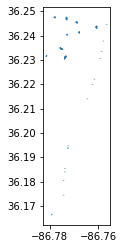

In [24]:
slow_emo_school.plot()

<AxesSubplot:>

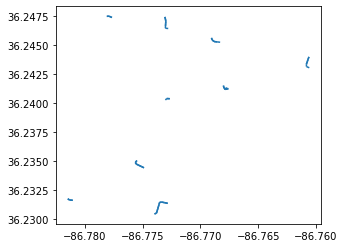

In [25]:
slow_emo_summer.plot()

In [26]:
slow_emo_scho_geojson = slow_emo_school['geometry'].to_json()

In [27]:
slow_emo_sum_geojson = slow_emo_summer['geometry'].to_json()

In [28]:
full_route = all_emo_inschool['geometry'].to_json()

In [29]:
am23_map = folium.Map(location =  [36.2, -86.7775], zoom_start = 12)
style3 = {'color': 'gray', 'weight' : 1}
folium.GeoJson(full_route, style_function=lambda x: style3).add_to(am23_map)
style1 = {'color': 'red', 'weight' : 6}
folium.GeoJson(slow_emo_scho_geojson, style_function=lambda x: style1).add_to(am23_map)
style2 = {'color': 'blue', 'weight' : 3}
folium.GeoJson(slow_emo_sum_geojson, style_function=lambda x: style2).add_to(am23_map)
am23_map

In [30]:
import pickle

In [31]:
with open('../data/route23_slow_emo_school.pickle', 'wb') as file:
        pickle.dump(slow_emo_school, file)

In [32]:
with open('../data/route23_slow_emo_summer.pickle', 'wb') as file:
        pickle.dump(slow_emo_summer, file)

with open('../data/route23_all_emo_inschool.pickle', 'wb') as file:
        pickle.dump(all_emo_inschool, file)